# Supervised Learning Project - Wine Quality Prediction (Red Wine)

---

## 1. Problem Description

In this project, we aim to predict the quality of red wine based on various chemical properties such as acidity, sugar, pH, and alcohol content.

- **Type of Learning:** Supervised Learning  
- **Type of Task:** Regression

---

## 2 Motivation

Predicting wine quality based on chemical features can help wine producers ensure consistent product standards and optimize their production processes.  
Building predictive models on such data can also deepen our understanding of which factors most influence perceived quality.


---

## 3. Data Collection and Description

- **Data Source:** UCI Machine Learning Repository – Wine Quality Dataset  
- **Link:** https://archive.ics.uci.edu/ml/datasets/Wine+Quality  
- **Data Collection Method:** Data from the physicochemical tests of Portuguese "Vinho Verde" red wine samples.

### 3.1 Data Size
- **Samples:** 1,599 red wine samples (rows)
- **Features:** 11 numeric input features + 1 target feature (quality score)

### 3.2 Feature Description

| Feature          | Type           | Description                    |
|:-----------------|:---------------|:-------------------------------|
| fixed acidity    | Numeric         | Tartaric acid concentration    |
| volatile acidity | Numeric         | Acetic acid concentration      |
| citric acid      | Numeric         | Citric acid concentration      |
| residual sugar   | Numeric         | Amount of remaining sugar      |
| chlorides        | Numeric         | Salt concentration             |
| free sulfur dioxide | Numeric      | Free SO₂ content               |
| total sulfur dioxide | Numeric     | Total SO₂ content              |
| density          | Numeric         | Wine density                   |
| pH               | Numeric         | Acidity level                  |
| sulphates        | Numeric         | Sulfate content                |
| alcohol          | Numeric         | Alcohol content (% vol)        |
| quality (target) | Integer (0-10)  | Quality score by human tasters |


### 3.3 Load and View Dataset

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("data/winequality-red.csv", sep=';')

# View first few rows
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


We loaded the Red Wine Quality dataset successfully using the appropriate separator (`;`).  
Upon inspecting the first few rows of the dataset,we  observed that all expected features were present with reasonable values.

## 4. Data Cleaning
### 4.1 Checking for Missing Values

In [2]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

To check for missing values, we used `df.isnull().sum()` and confirmed that there are no missing values across any feature.  
Thus, no imputation or handling of missing data is necessary for this dataset.

### 4.2 Outlier Detection

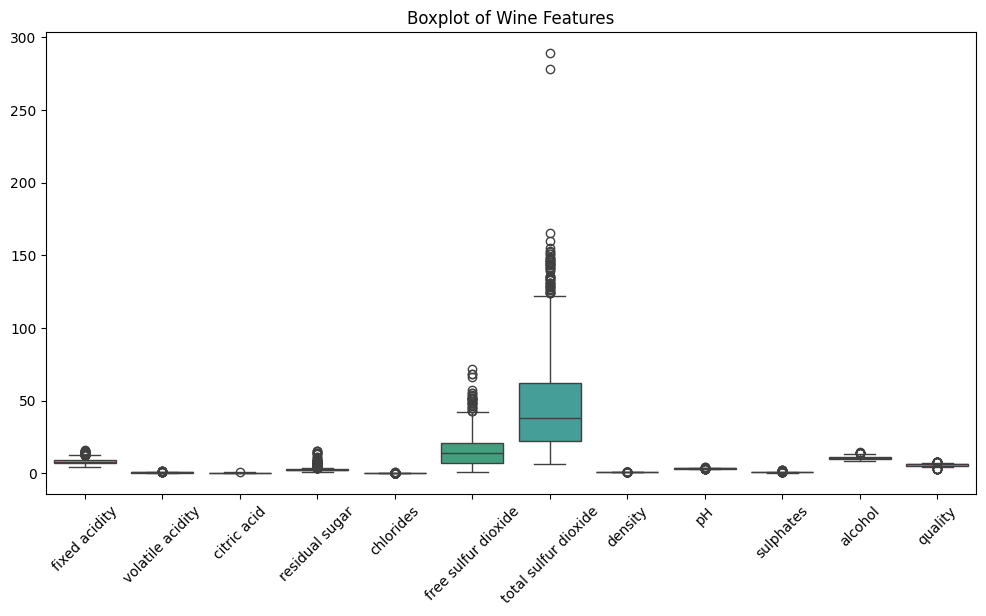

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
# plt.ylim(0, 30)
plt.title("Boxplot of Wine Features")
plt.show()

From this plot we visualized the boxplots for all features together. Due to the wide range of values, especially for `free sulfur dioxide` and `total sulfur dioxide`, smaller variations in other features were hard to observe.

Thus, we created focused boxplots as follow:
- A plot for sulfur dioxide features separately,
- A plot for medium-scale features like `fixed acidity`, `residual sugar`, and `alcohol`,
- A plot for the remaining low-variance features.

#### a. Sulfur Dioxide Features

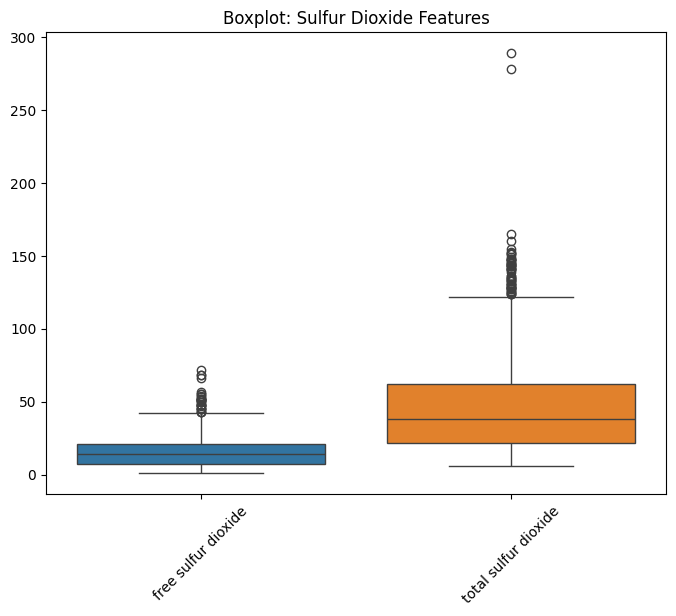

In [4]:
# Sulfur Dioxide Features
plt.figure(figsize=(8,6))
sns.boxplot(data=df[['free sulfur dioxide', 'total sulfur dioxide']])
plt.xticks(rotation=45)
plt.title("Boxplot: Sulfur Dioxide Features")
plt.show()

From this Sulfur Dioxide Features boxplot, we observed:
- **Free sulfur dioxide** and **total sulfur dioxide** show a large number of extreme values (outliers), which may reflect natural variability or measurement conditions.


#### b. Medium Features

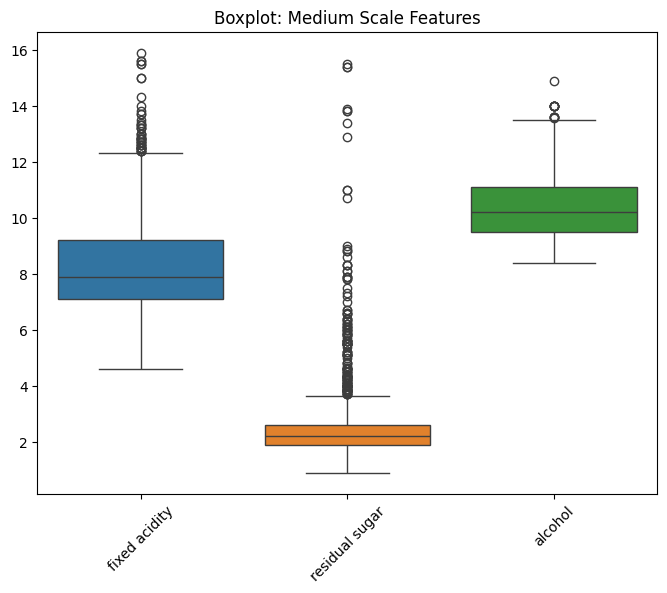

In [5]:
# Medium Features
plt.figure(figsize=(8,6))
sns.boxplot(data=df[['fixed acidity', 'residual sugar', 'alcohol']])
plt.xticks(rotation=45)
plt.title("Boxplot: Medium Scale Features")
plt.show()

From this Medium Features boxplot, we observed:

- **Residual sugar** and **alcohol** also show some outliers, but to a lesser extent.



#### c: Remaining Features

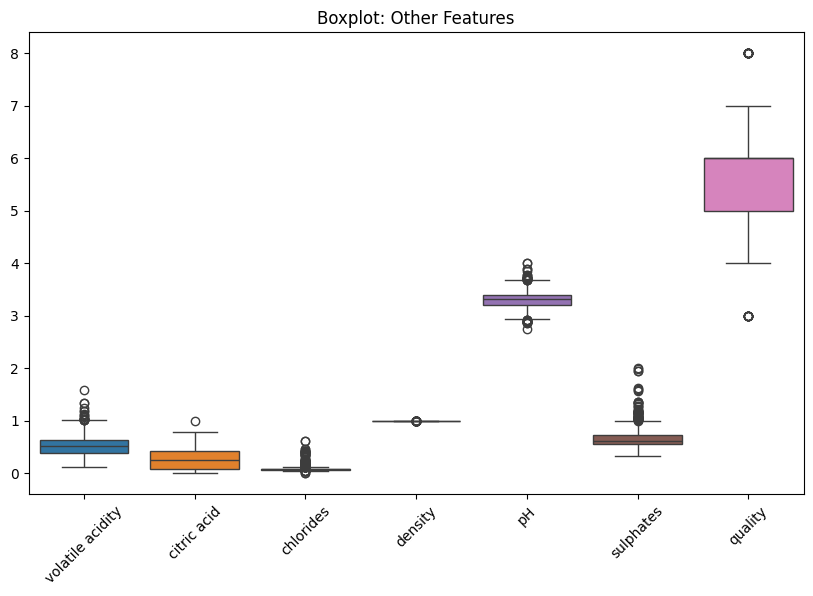

In [6]:
# c. Remaining Features
plt.figure(figsize=(10,6))
sns.boxplot(data=df[['volatile acidity', 'citric acid', 'chlorides', 'density', 'pH', 'sulphates', 'quality']])
plt.xticks(rotation=45)
plt.title("Boxplot: Other Features")
plt.show()

From this Remaining Features boxplot, we observed:

- Features like **pH**, **sulphates**, and **density** show very few outliers and are relatively tightly distributed.

Since outliers are expected in chemical measurements and could carry meaningful information about wine properties, we decided to **retain all data points** for modeling at this stage, rather than removing them.


## 5. Exploratory Data Analysis (EDA)

### 5.0 Data Exploration Strategy

Before building machine learning models, it is important to understand the structure and patterns of the data.  
We used histograms to visualize the distributions of each feature and identify skewness or outliers.  
We also computed a correlation matrix to examine relationships between features and with the target variable.  
This helped us detect potential multicollinearity and identify important predictors.

### 5.1 Histograms

We plotted histograms of each numerical feature to understand their distributions:

- Features like `residual sugar`, `chlorides`, and `total sulfur dioxide` show strong right-skewed distributions.
- `Alcohol` and `sulphates` are also right-skewed but less extreme.
- `pH` and `density` are closer to a normal (bell-shaped) distribution.
- `Quality` scores are concentrated around 5–6, with very few wines rated extremely high or low.

Overall, the data exhibits a mix of skewed and relatively normal distributions, which will inform our model choice and potential transformations.

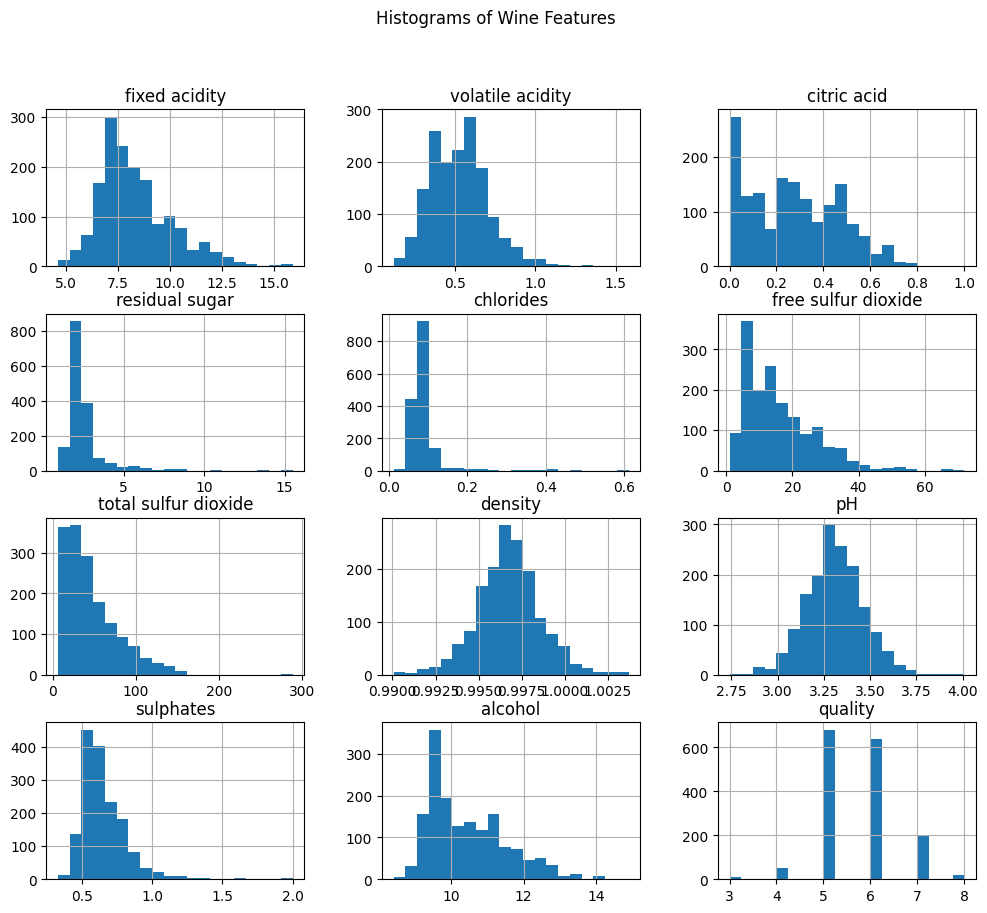

In [7]:
df.hist(figsize=(12,10), bins=20)
plt.suptitle("Histograms of Wine Features")
plt.show()


### 5.2 Correlation Matrix

We computed the correlation matrix to understand the relationships between different features. Key observations include:

- **Alcohol** has the strongest positive correlation with wine quality (`+0.48`), suggesting that higher alcohol content generally leads to higher-rated wines.
- **Volatile acidity** has a moderate negative correlation with wine quality (`-0.39`), indicating that higher volatile acidity levels tend to lower the perceived quality.
- **Sulphates** show a small positive correlation with quality (`+0.25`).
- **Free sulfur dioxide** and **total sulfur dioxide** are strongly positively correlated with each other (`+0.67`), as expected.
- Most other features show relatively weak correlations with wine quality.

Understanding these correlations helps us in selecting important features for our predictive modeling.


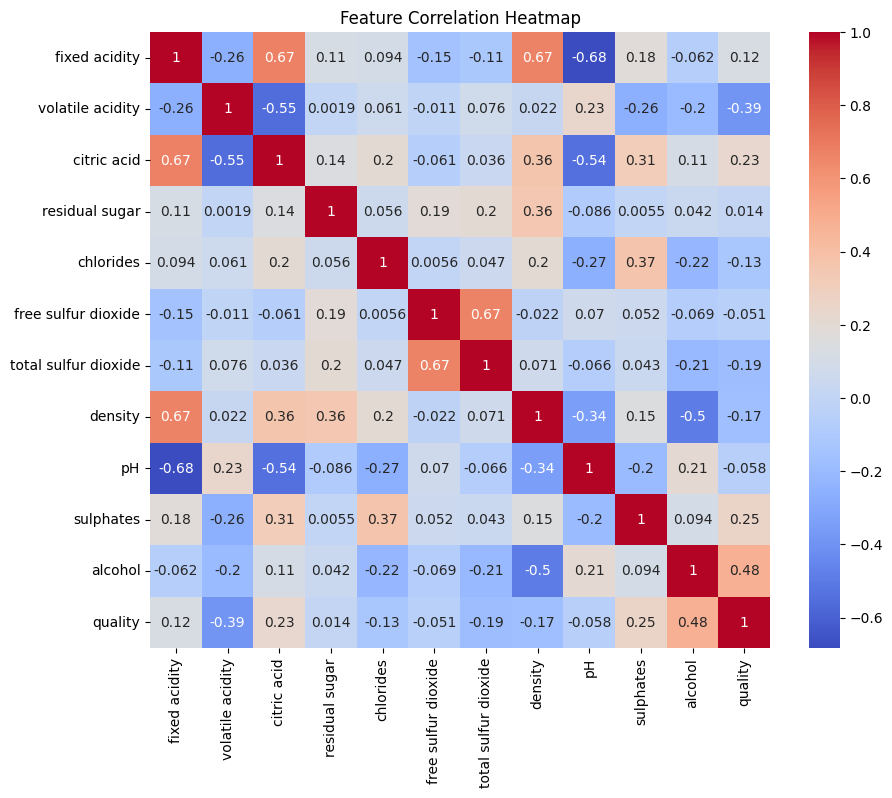

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


## 6. Model Building and Training

### 6.0 Model Selection Strategy

We started by training a Linear Regression model as a baseline because it is simple, interpretable, and effective when relationships between features and the target are linear.  
To capture potential non-linear patterns in the data, we also trained a Random Forest Regressor, an ensemble model capable of handling complex interactions and providing feature importance insights.  
Comparing these two models allowed us to evaluate whether the relationships in the dataset were primarily linear or more complex.


We split the dataset into training and testing sets with an 80/20 ratio, using a random state for reproducibility.

We then trained two models:
- A **Linear Regression** model as a baseline.
- A **Random Forest Regressor** model to capture non-linear relationships.

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


X = df.drop('quality', axis=1)
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### 6.1 Linear Regression

We first trained a simple Linear Regression model as a baseline.


In [10]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)


LinearRegression()

### 6.2 Random Forest Regressor

We then trained a Random Forest Regressor to better capture complex, non-linear relationships in the data.


In [11]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

## 7. Model Evaluation

We evaluated both models on the test set using Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R² score.


### 7.1 Linear Regression Evaluation

In [12]:
# Predictions for Linear Regression

y_pred_lin = lin_reg.predict(X_test)

# Evaluation
mse_lin = mean_squared_error(y_test, y_pred_lin)
rmse_lin = mse_lin ** 0.5  # Take square root manually
r2_lin = r2_score(y_test, y_pred_lin)

print("Linear Regression Performance:")
print(f"MSE: {mse_lin:.2f}")
print(f"RMSE: {rmse_lin:.2f}")
print(f"R² Score: {r2_lin:.2f}")



Linear Regression Performance:
MSE: 0.39
RMSE: 0.62
R² Score: 0.40


### 7.2 Random Forest Evaluation

In [13]:
# Predictions for Random Forest
y_pred_rf = rf_reg.predict(X_test)

# Evaluation
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mse_rf ** 0.5  # Take square root manually
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regressor Performance:")
print(f"MSE: {mse_rf:.2f}")
print(f"RMSE: {rmse_rf:.2f}")
print(f"R² Score: {r2_rf:.2f}")



Random Forest Regressor Performance:
MSE: 0.30
RMSE: 0.55
R² Score: 0.54


### 7.3 Comparison and Observation

- The Random Forest Regressor achieved a lower MSE and higher R² score compared to Linear Regression, indicating better predictive performance.
- Random Forest was able to capture non-linear relationships in the data that the simple Linear Regression model could not.
- Therefore, for this dataset, Random Forest is the preferred model.


## 8. Feature Importance

We analyzed feature importances using the Random Forest model. The plot below shows the most influential features in predicting wine quality.

Key observations:
- **Alcohol** is the most important feature for predicting wine quality.
- **Sulphates** and **volatile acidity** also contribute significantly.
- Other features like **residual sugar** and **chlorides** have relatively lower importance.

This insight matches our earlier correlation analysis, where alcohol was strongly positively correlated with wine quality.


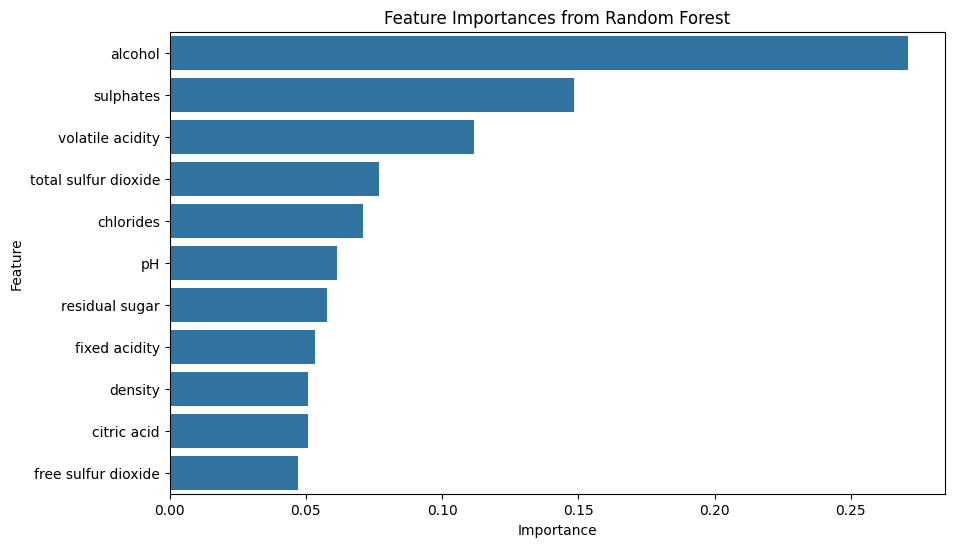

In [14]:
importances = rf_reg.feature_importances_
features = X.columns

feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df.sort_values('Importance', ascending=False, inplace=True)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title("Feature Importances from Random Forest")
plt.show()

We also build a scatter plot of Alcohol vs Quality to see visually that higher alcohol = higher quality?

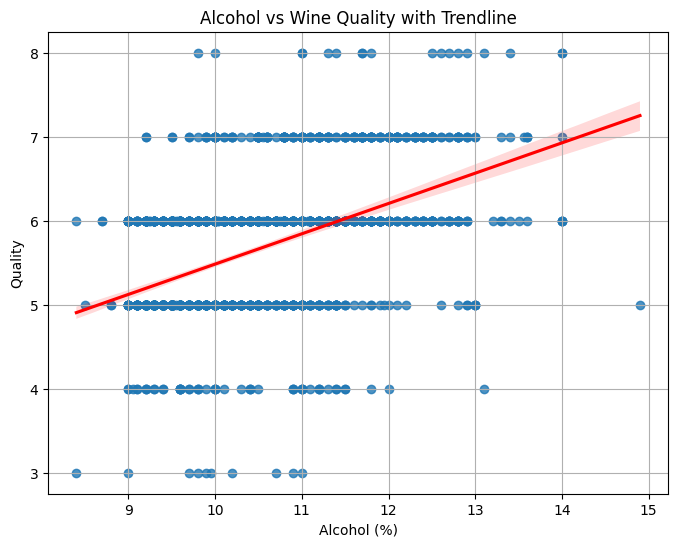

In [16]:
# Scatter plot of Alcohol vs Quality

plt.figure(figsize=(8,6))
sns.regplot(x=df['alcohol'], y=df['quality'], scatter=True, line_kws={"color":"red"})
plt.title('Alcohol vs Wine Quality with Trendline')
plt.xlabel('Alcohol (%)')
plt.ylabel('Quality')
plt.grid(True)
plt.show()


The scatter plot shows that higher alcohol content is generally associated with higher wine quality scores, supporting the positive correlation observed in the correlation matrix.


## 9. Discussion and Conclusion

In this project, we successfully built predictive models to estimate wine quality based on chemical features.

- Between the two models, the **Random Forest Regressor** performed better than the **Linear Regression** model, achieving a lower MSE and a higher R² sc
- Using our Random Forest Model provides a fast and affordable way for winemakers to predict wine quality scores from chemical tests. Instead of waiting for human taste panels, they can estimate quality immediately after production. This helps with quality control, marketing, and blending strategiesore.
- Feature importance analysis revealed that **alcohol** is the strongest predictor of wine quality, followed by **sulphates** and **volatile acidity**.
- Some issues faced included dealing with outliers and the skewed distributions of several features. We chose to retain all data points to preserve the integrity of the dataset.
- Possible improvements could include hyperparameter tuning of the Random Forest model, applying feature transformations to reduce skewness, and trying additional models like Gradient Boosting or XGBoost.

Overall, this project highlights the power of machine learning in predicting outcomes based on structured data, and the importance of thorough data exploration and model evaluation.


## 10. References

- UCI Machine Learning Repository. (n.d.). Wine Quality Dataset. Retrieved from [https://archive.ics.uci.edu/ml/datasets/Wine+Quality](https://archive.ics.uci.edu/ml/datasets/Wine+Quality)
- Scikit-learn documentation
- Seaborn documentation
- Matplotlib documentation


## *Thank You*

*Thank you for reviewing this project. I enjoyed exploring the Wine Quality dataset and applying machine learning techniques to uncover meaningful patterns and build predictive models.*
